# Public transport traffic in France
Data is based on french public train transport carrier SNCF information about traffic from years 2015-2020. Link to the dataset:  
[Public transport traffic data in France on Kaggle](https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france "Public transport traffic data in France on Kaggle")

**What** can be assessed using this dataset?
- Is average delay of late arriving trains correlated with number of expected circulations?
- Is traffic management getting better and thus it is less common for trains to be delayed?
- Are there any significant improvements in average travel time with every year?
- Can an decrease/increase of traffic to specified location over 2015-2020 years be observed?

## Import all the necessary libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Reading the data

In [18]:
data = pd.read_csv("../data/Regularities_by_liaisons_Trains_France.csv", sep=",")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 32 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure station                                                                                                    7806 non-null   object 
 3   Arrival station                                                                                                      7806 non-null   object 
 4   Average trav

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


### Suitable conversion of columns
`Year` column is converted to categorical value for easier grouping and aggregation techniques.

In [24]:
data['Year'] = pd.Categorical(data['Year'])
data['Year']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
7801    2020
7802    2020
7803    2020
7804    2020
7805    2020
Name: Year, Length: 7806, dtype: category
Categories (6, int64): [2015, 2016, 2017, 2018, 2019, 2020]

## Explore
Dataset exploration section of the notebook showing basic information of the columns such as distributions etc.



### One variable plots

[Text(0.5, 1.0, 'Count of observations per calendar year.')]

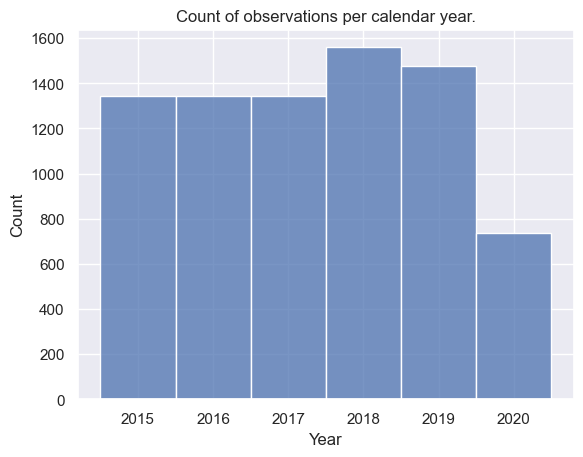

In [28]:
sns.histplot(x=data["Year"]).set(title="Count of observations per calendar year.")

<AxesSubplot:xlabel='Average travel time (min)'>

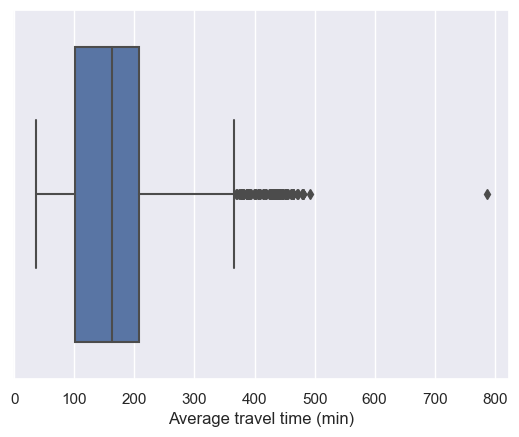

In [29]:
sns.boxplot(data, x="Average travel time (min)")

<AxesSubplot:xlabel='Number of trains late on arrival', ylabel='Count'>

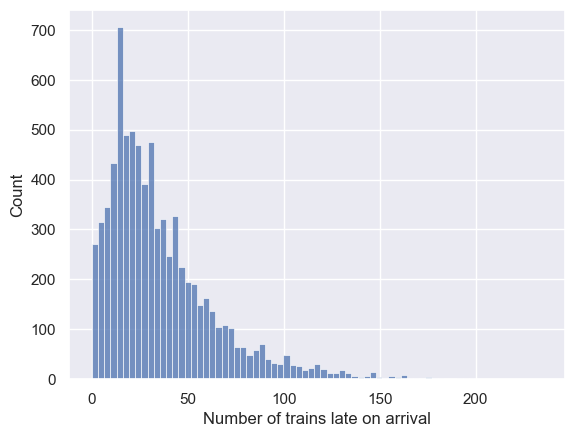

In [30]:
sns.histplot(data, x="Number of trains late on arrival")

### Two or more variables plots

<AxesSubplot:xlabel='Number of expected circulations', ylabel='Number of late trains at departure'>

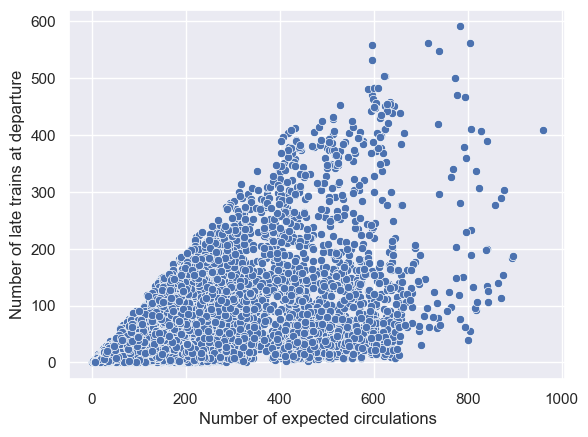

In [37]:
sns.scatterplot(data, x="Number of expected circulations", y="Number of late trains at departure")

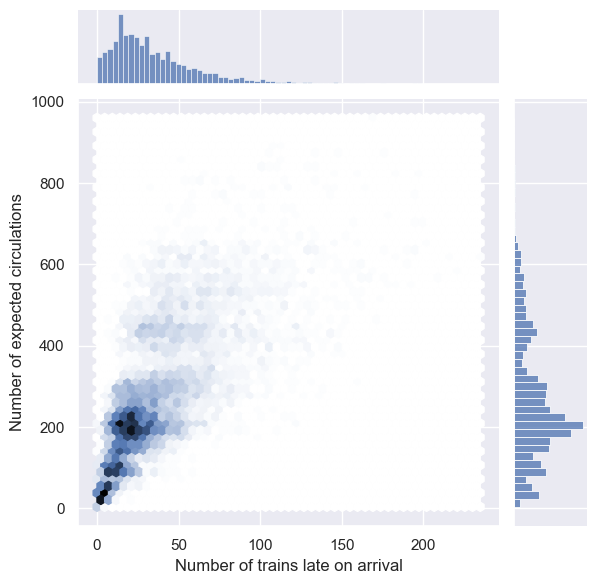

In [40]:
sns.jointplot(data, x="Number of trains late on arrival", y="Number of expected circulations", kind="hex")

<AxesSubplot:xlabel='Year', ylabel='Average travel time (min)'>

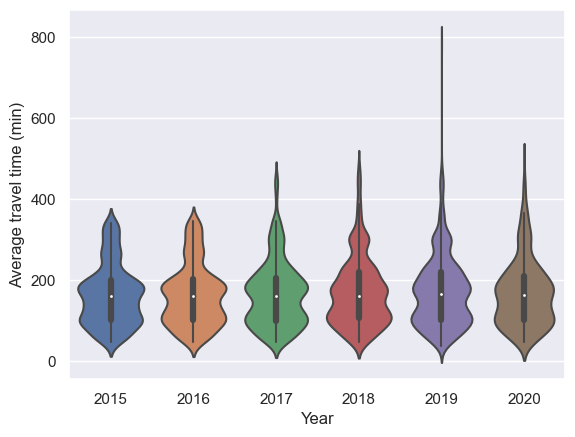

In [41]:
sns.violinplot(data, x="Year", y="Average travel time (min)")

## What can be observed so far?
It is visible that the trains rarely have a delay of more than 100 minutes, and it is very unusual for trains to have a delay of more than 150 minutes. One can say that late arrivals happen more often on the routes where the expected number of circulations is rather low. It can be also observed that the median of travel time over years 2015-2020 hasn't changed much.